<a href="https://colab.research.google.com/github/Jasjot-Kaur/Seoul-Bike-Sharing-Demand-Prediction_Linear-Regression/blob/main/Regression_Seoul_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


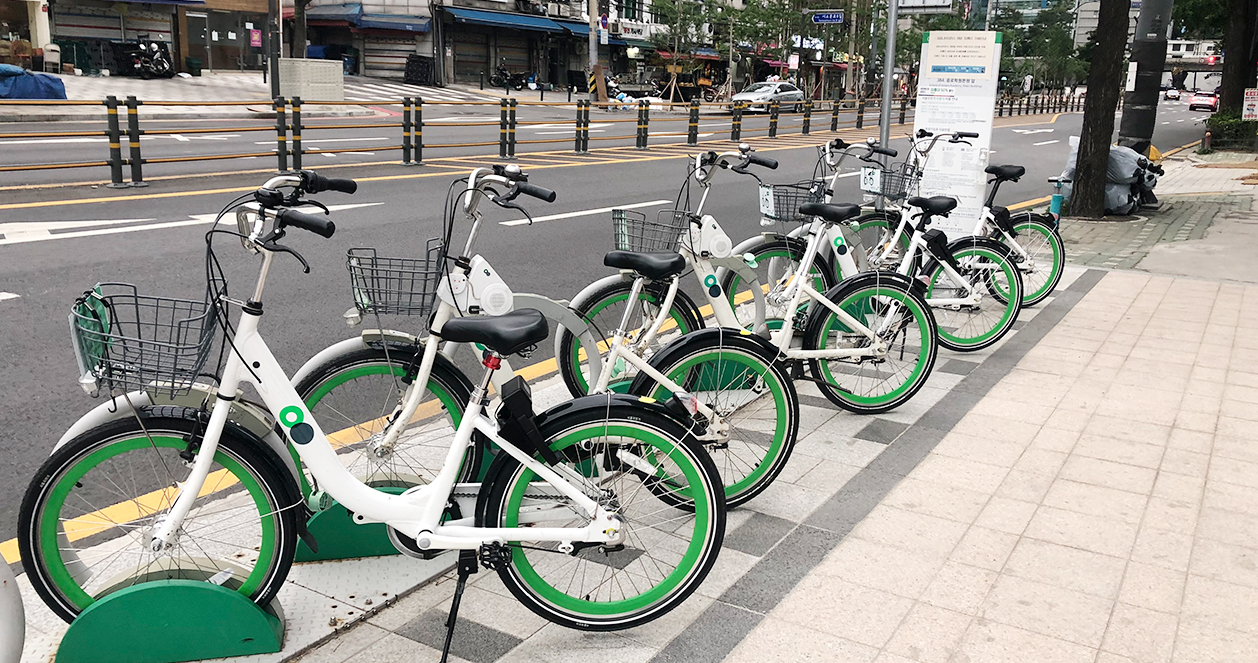

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')


plt.style.use('ggplot')


## **Mounting Drive**

In [ ]:
# mounting drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#csv file location

file_location = '/content/drive/MyDrive/Alma Better/Capstone Projects/Capstone 2_Regression/Seoul Bike Sharing Demand Prediction/SeoulBikeSharingData.csv'

## **Reading the Seoul bike rentals dataset**



In [ ]:
#reading csv file

df_bike = pd.read_csv(file_location,encoding='unicode_escape')

## **Data Pre-processing**


---



In [ ]:
# datatset's features' information 

df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# creating a copy of the original dataset

df_b = df_bike.copy()
df_b

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
df_b.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df_b.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### **Checking null values**

In [ ]:
# checking the total null values

df_b.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# checking the datatype of the features

df_b.dtypes

### **Inference**

*   The dataset originally contains 14 features for 8760 records; the readings of these 14 parameters were recorded on different days and time of a day
*   No null values are found
*   The different datatypes of the features observed are as follows:
    *    float type: 6 features (Temperature(°C), Wind speed (m/s), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm))
    *int type: 4 features (Rented Bike Count, Hour, Humidity(%), Visibility (10m))
    *object type: 4 features (Date, Seasons, Holiday, Functioning Day)



### **Datatype conversion**

In [ ]:
# Date columns to Date format conversion

df_b['Date']= pd.to_datetime(df_b['Date'])

In [ ]:
# creating 'date', 'month' and 'year' columns from the existing 'Date' column 

df_b["date"] = pd.DatetimeIndex(df_b["Date"]).day
df_b['month'] = df_b['Date'].apply(lambda x : x.month)          # lambda function is used so that month converts into int type
df_b["year"] = pd.DatetimeIndex(df_b["Date"]).year

In [ ]:
df_b["month"]

0        1
1        1
2        1
3        1
4        1
        ..
8755    11
8756    11
8757    11
8758    11
8759    11
Name: month, Length: 8760, dtype: int64

In [ ]:
df_b['month'].isnull().sum()

0

In [ ]:
# Removing the date column

df_b.drop(["Date"], axis = 1, inplace = True)

In [ ]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  date                       8760 non-null   int64

In [ ]:
df_b['date']

0       12
1       12
2       12
3       12
4       12
        ..
8755    30
8756    30
8757    30
8758    30
8759    30
Name: date, Length: 8760, dtype: int64

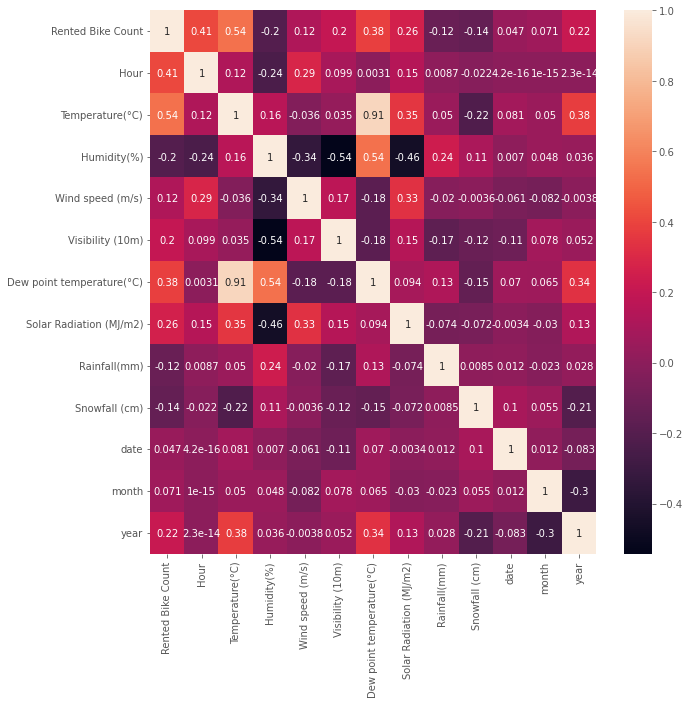

In [ ]:
# Checking correlations between features

plt.figure(figsize=(10,10))
sns.heatmap(df_b.corr(),annot=True)

In [ ]:
# Finding VIF to check multicollinearity among features

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
# improving VIF
 
calc_vif(df_b[[i for i in df_b.describe().columns if i not in ['Rented Bike Count','year','Dew point temperature(°C)'] ]])

,variables,VIF
0,Hour,3.998419
1,Temperature(°C),3.236167
2,Humidity(%),6.757926
3,Wind speed (m/s),4.621365
4,Visibility (10m),5.455330
5,Solar Radiation (MJ/m2),2.280208
6,Rainfall(mm),1.081555
7,Snowfall (cm),1.136671
8,date,3.849545
9,month,4.603431


##**Exploratory Data Analysis**


---



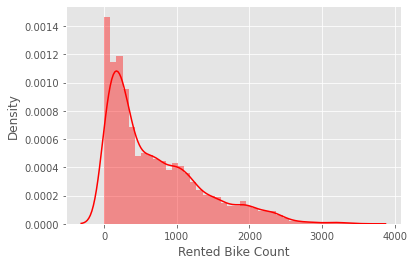

In [ ]:
# plotting and analysing density distribution of the dependent variabe: Rented Bike Count

sns.distplot(df_b['Rented Bike Count'], color = 'r')

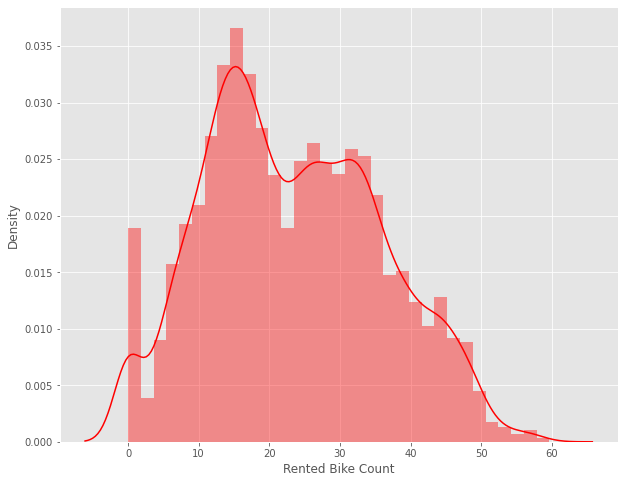

In [ ]:
# Applying square root transormation on right skewed data 

plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(df_b['Rented Bike Count']), color = 'r')

###BARPLOTS


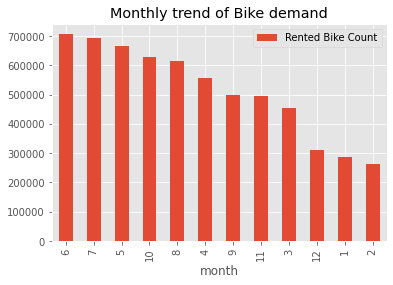

In [ ]:
# Barplot: rented bikes count per month 

df_b.groupby('month').sum().sort_values('Rented Bike Count', ascending=False)[['Rented Bike Count']].plot.bar()
plt.title("Monthly trend of Bike demand")
plt.show()

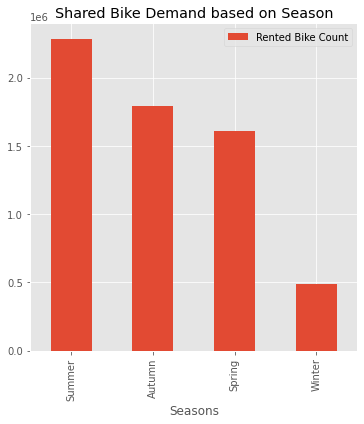

In [ ]:
# Barplot: rented bikes count in various seasons

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(1, 3, 1, title="Shared Bike Demand based on Season")

df_b.groupby('Seasons').sum().sort_values('Rented Bike Count', ascending=False)[['Rented Bike Count']].plot.bar(ax=ax1)

plt.tight_layout()
plt.show()

### *Enlisting numeric features*

____


In [ ]:
# Numeric Features

numeric_features = df_b.select_dtypes(exclude='object')

In [ ]:
# Numeric Features info

numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  date                       8760 non-null   int64  
 11  month                      8760 non-null   int64  
 12  year                       8760 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 889.8 KB


### *Visualising numeric features*

___

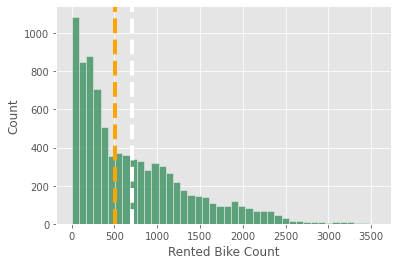

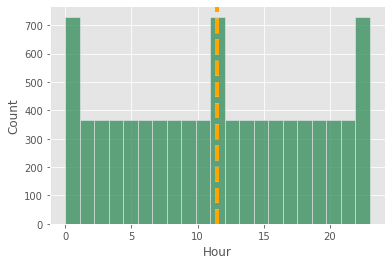

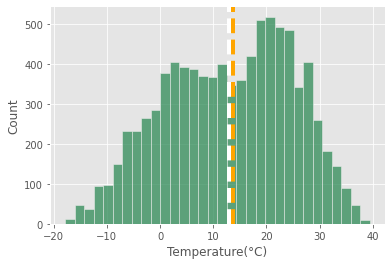

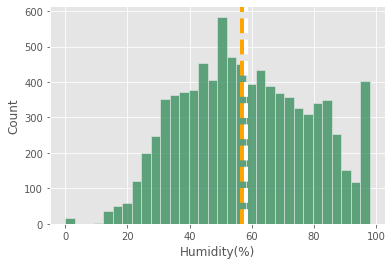

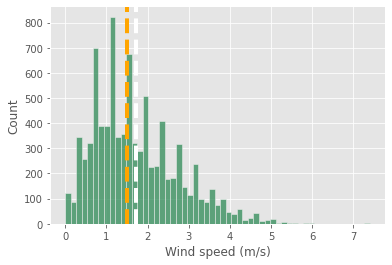

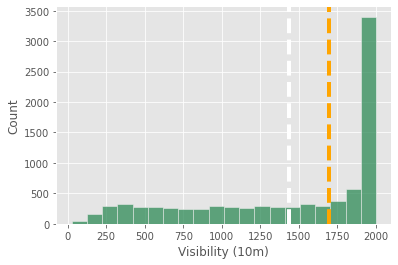

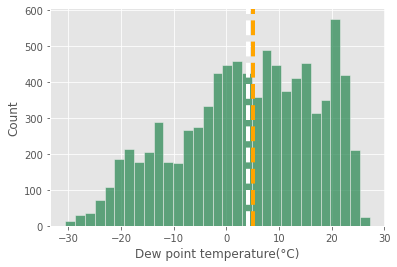

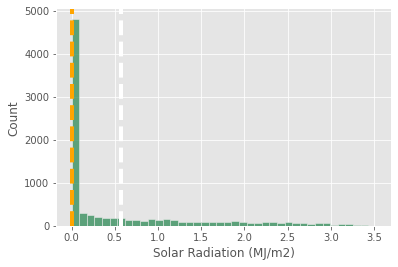

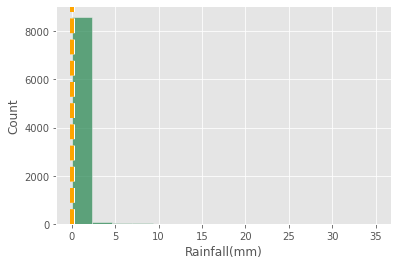

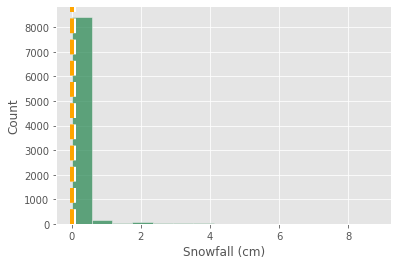

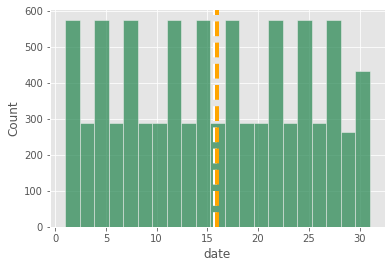

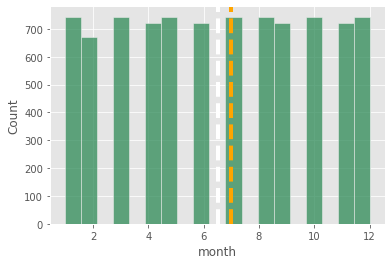

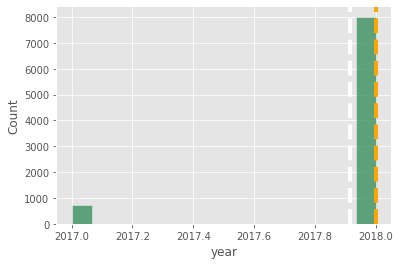

In [ ]:
#plotting histogram

for col in numeric_features[:]:
  sns.histplot(df_b[col], color = 'seagreen')
  plt.axvline(df_b[col].mean(), color='white', linestyle='dashed', linewidth=4)
  plt.axvline(df_b[col].median(), color='orange', linestyle='dashed', linewidth=4)   
  plt.show()

#### **Inference**


1.   From the above plots it can be observed that rented bike count, windspeed, solar radiation and snowfall are highly right skewed.

  Among all these positively skewed columns, solar radiation is found to have the maximum outliers.

2.   It is obserevd that temperature, humidity and dew point temperature are moderately left skewed, while visibility is found to be extremely left skewed (negatively skewed). This indicates the presence of a large number of outliers in visibility.


3. It can be oberserved that there are more records of year 2018 than 2017.

## REGRESSION STARTS!!

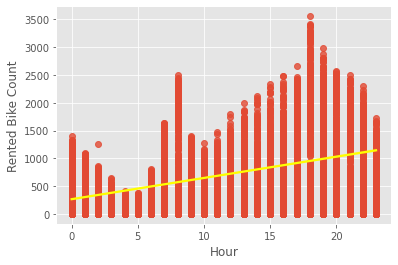

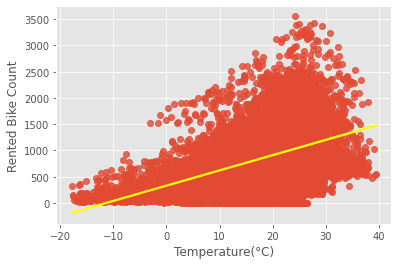

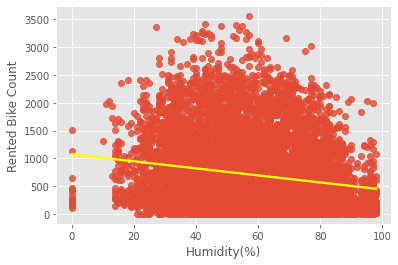

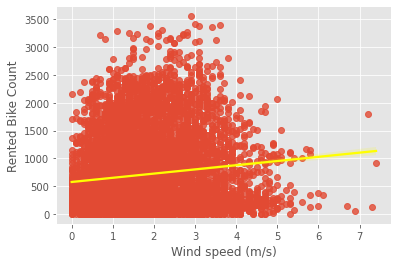

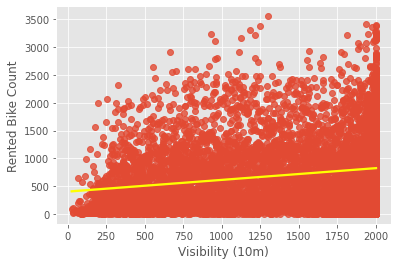

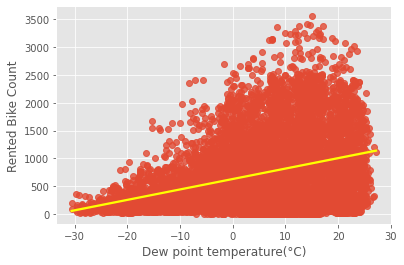

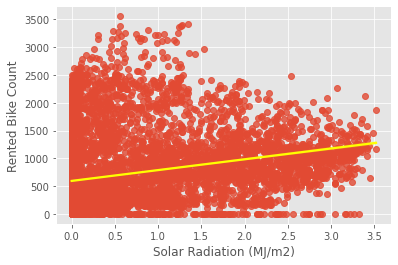

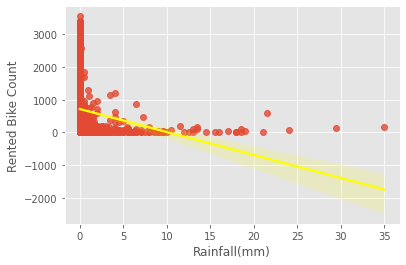

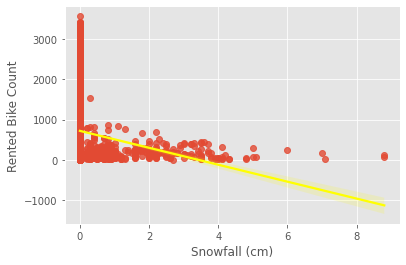

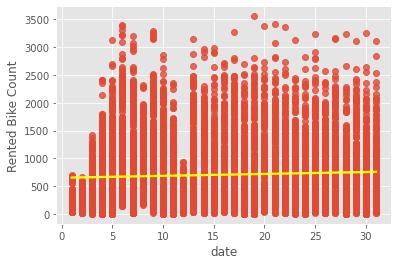

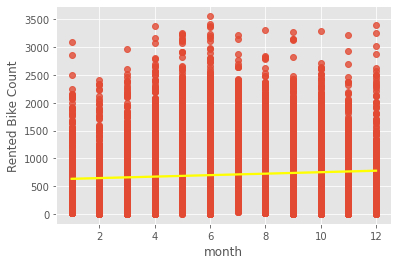

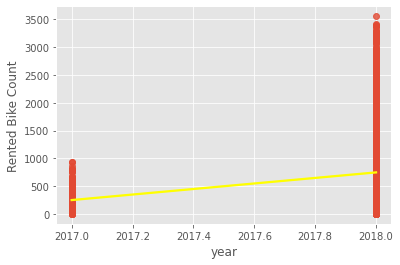

In [ ]:
# Regression plot of each columns of dataset v/s rented bike count columns

for col in numeric_features[:]:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=df_b[col],y=df_b["Rented Bike Count"],line_kws={"color": "yellow"})
  
  plt.show()


### **Inference**


1.   It can be obererved that rented bike count have high positive correlation with hour, temperature, wind speed, visibility, dew point temperature, solar radiation and year

2.   Humudity, rainfall and snowfall are found to have high negative correlation woth rented bike count




### *Enlisting Categorical Features*
_______

In [ ]:
categorical_features= df_b.select_dtypes(include='object')

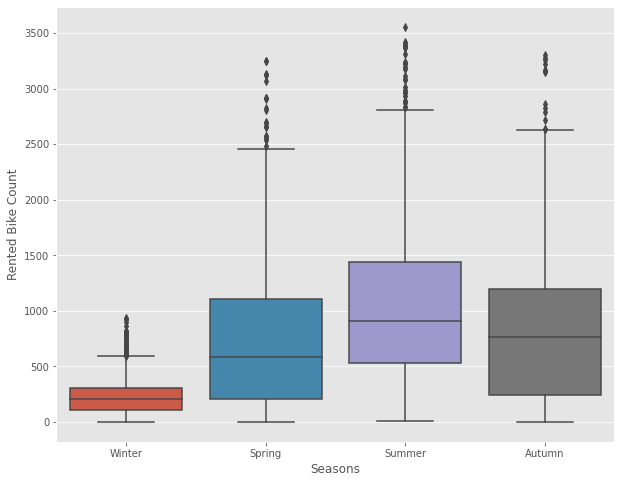

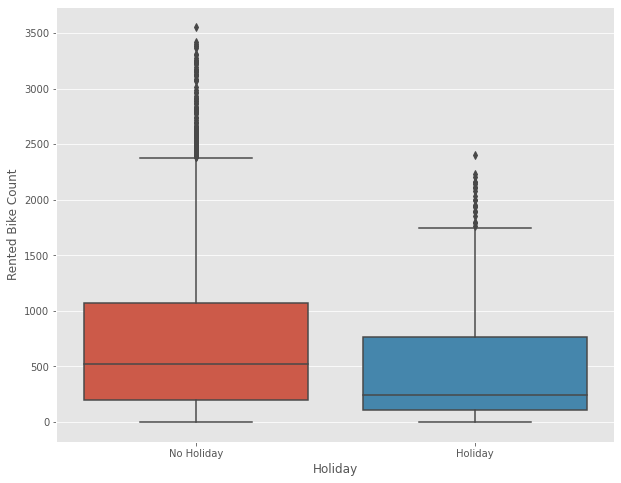

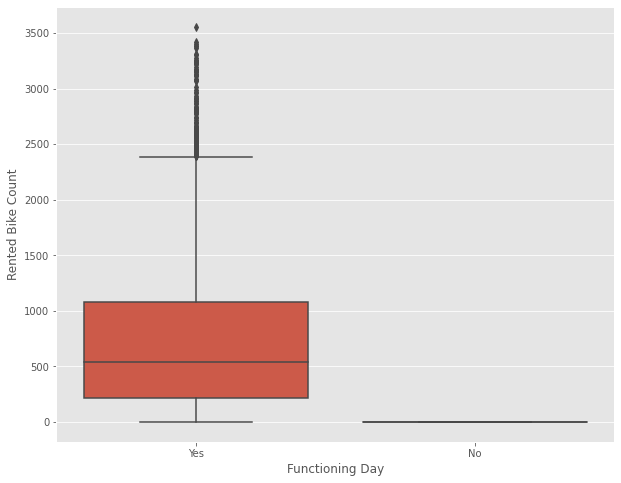

In [ ]:
# Box plot to visualize and draw information from plots

for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df_b[col],y=df_b["Rented Bike Count"])
  plt.show()

### **Inference**

1.   We can clearly see that there is less demand of rented bike during winter season.

2.   While bikes were rented both on holidays and non-holiday (working) days, the rental bike demands was seen more during working days.

3.   The functioning day recoreded to have most bikes rented; this may indicate that either the data have been collected on the functioning daya or there was no service of bike rentals during non-functioning days.


### *Visualising categorical features against rented bike count*

_________

<Figure size 6000x6000 with 0 Axes>

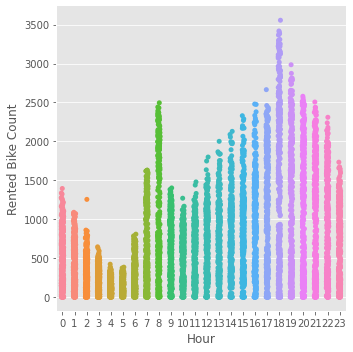

<Figure size 6000x6000 with 0 Axes>

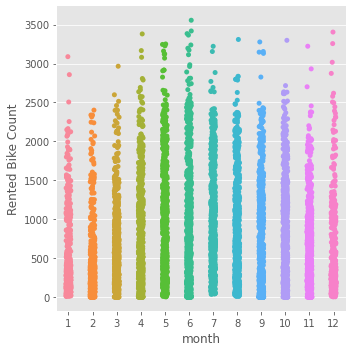

<Figure size 6000x6000 with 0 Axes>

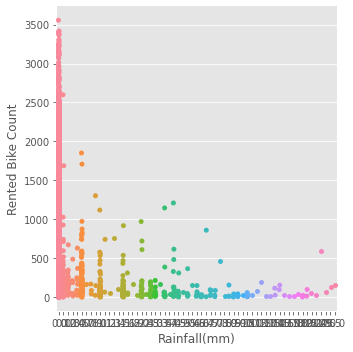

<Figure size 6000x6000 with 0 Axes>

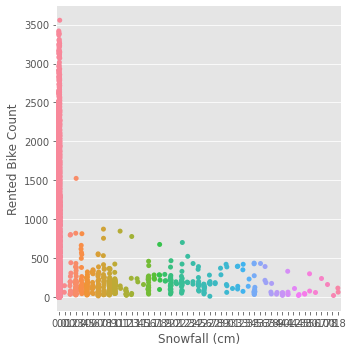

In [ ]:
# Catplot of some features to get more information

feature_list=["Hour","month",'Rainfall(mm)','Snowfall (cm)']
for feature in feature_list:
  plt.figure(figsize=(30,30),dpi=200)
  sns.catplot(x=feature,y='Rented Bike Count',data=df_b)
  plt.show()

### **Inference**

1.   We can clearly see that bikes were rented the most in the month of June
2.   Maximum bikes were rented at 18th hour of the day (i.e 6 p.m. when the people leave their office)

3.   It can also be observed that people prefered renting bikes with clear waether with no or little snowfall and rainfall.


### *Visualising average bikes rented per hour*
________

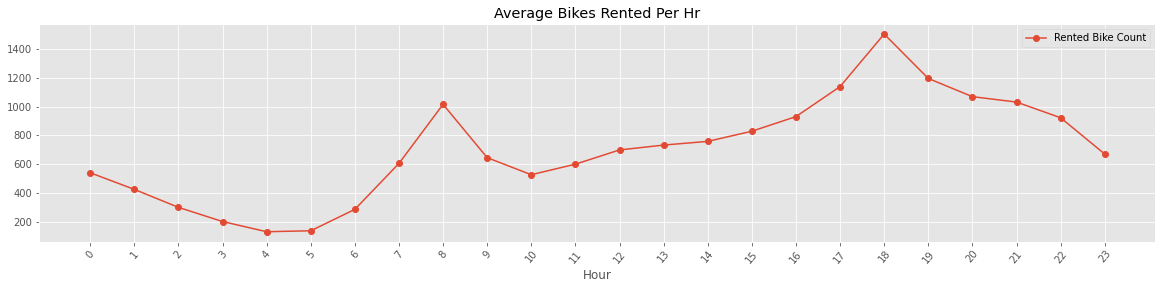

In [ ]:
# Line graph

# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = df_b.groupby('Hour')['Rented Bike Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=50);


### **Inference**

 

1.   There was high rise of rented Bikes from 8:00 a.m to 9:00 p.m; indicating that people prefered rented bike during rush hours.

2.   We can clearly see that rental bike demand peaked at 8 a.m in the morning and 6:00 p.m in the evening. So we can say that that during office opening and closing time there is much high demand of bike rentals.





## *Converting categorical features into numeric*
_________

In [ ]:
#creating Dummy variable for categorical columns; One-Hot Encoding

dummy_categories= pd.get_dummies(categorical_features)

In [ ]:
dummy_categories

,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,0,0,0,1,0,1,0,1
1,0,0,0,1,0,1,0,1
2,0,0,0,1,0,1,0,1
3,0,0,0,1,0,1,0,1
4,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...
8755,1,0,0,0,0,1,0,1
8756,1,0,0,0,0,1,0,1
8757,1,0,0,0,0,1,0,1
8758,1,0,0,0,0,1,0,1


In [ ]:
# concating numeric columns and dummy columns and creating final df to be used for further model training and testing

final_df= pd.concat([dummy_categories,numeric_features],axis=1)

In [ ]:
# columns of final dataset created

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Seasons_Autumn             8760 non-null   uint8  
 1   Seasons_Spring             8760 non-null   uint8  
 2   Seasons_Summer             8760 non-null   uint8  
 3   Seasons_Winter             8760 non-null   uint8  
 4   Holiday_Holiday            8760 non-null   uint8  
 5   Holiday_No Holiday         8760 non-null   uint8  
 6   Functioning Day_No         8760 non-null   uint8  
 7   Functioning Day_Yes        8760 non-null   uint8  
 8   Rented Bike Count          8760 non-null   int64  
 9   Hour                       8760 non-null   int64  
 10  Temperature(°C)            8760 non-null   float64
 11  Humidity(%)                8760 non-null   int64  
 12  Wind speed (m/s)           8760 non-null   float64
 13  Visibility (10m)           8760 non-null   int64

In [ ]:
# final Dataset

final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Seasons_Autumn,8760.0,0.249315,0.432641,0.0,0.00,0.00,0.00,1.00
Seasons_Spring,8760.0,0.252055,0.434217,0.0,0.00,0.00,1.00,1.00
Seasons_Summer,8760.0,0.252055,0.434217,0.0,0.00,0.00,1.00,1.00
Seasons_Winter,8760.0,0.246575,0.431042,0.0,0.00,0.00,0.00,1.00
Holiday_Holiday,8760.0,0.049315,0.216537,0.0,0.00,0.00,0.00,1.00
Holiday_No Holiday,8760.0,0.950685,0.216537,0.0,1.00,1.00,1.00,1.00
Functioning Day_No,8760.0,0.033676,0.180404,0.0,0.00,0.00,0.00,1.00
Functioning Day_Yes,8760.0,0.966324,0.180404,0.0,1.00,1.00,1.00,1.00
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00



### *Correlation among features in the final dataset*
_________

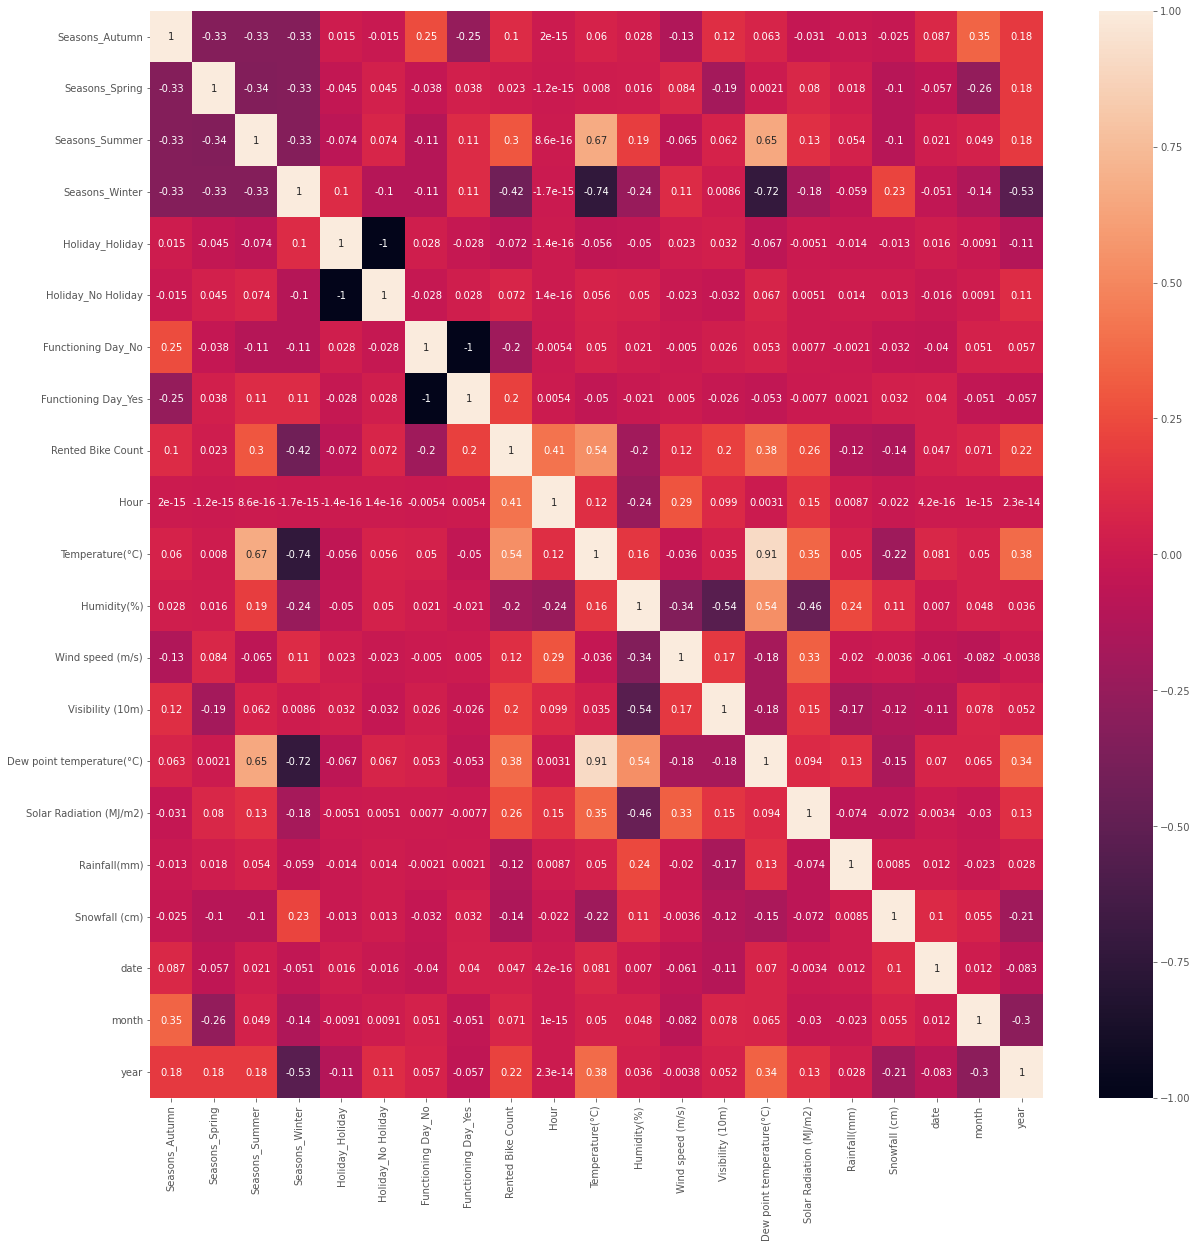

In [ ]:
# Heat map

plt.figure(figsize=(20,20))
sns.heatmap(final_df.corr(),annot=True)

__________

###**Creating function to train linear models and calculate scores**


In [ ]:
# functions for linear regression
 
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]


In [ ]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

  #training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evalution Matrix=========================\n')
  

#appending metrices to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # plotting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

_________

### Splitting the data into training and testing dataset

In [ ]:
# Train - Spliting  data ## Assigning Independent Variables
X = final_df.drop(['Rented Bike Count'],axis=1)

In [ ]:
X.shape

(8760, 20)

In [ ]:
# square root transformation of the dependent variable 

y=np.sqrt(df_b['Rented Bike Count'])   

In [ ]:
#spliting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

____________

#LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#linear regression model

linear_model = LinearRegression()


================Evalution Matrix=========================

MSE : 173813.75295174523
RMSE : 416.90976595870865
R2 : 0.5832901176059528
Adjusted R2 :  0.5794477028305351

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



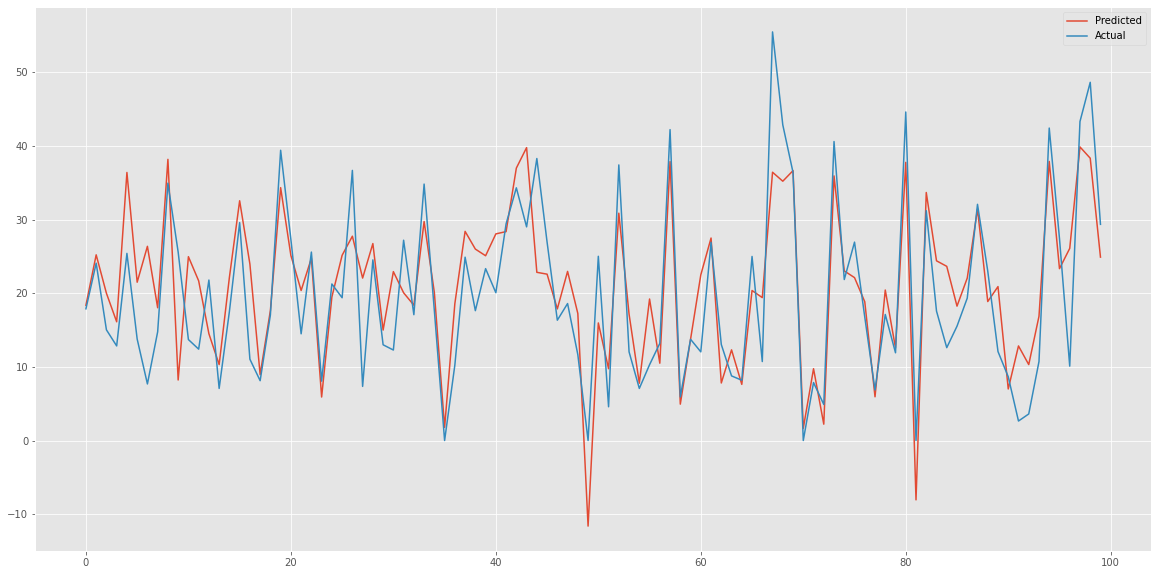

In [ ]:
train_linear_model(linear_model, X_train, y_train, X_test, y_test)

# **Regularisation**

##**Lasso Regression**



In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# finding the best parameters for lasso by gridsearchcv

from sklearn.model_selection import GridSearchCV

lasso_model = Lasso()

#setting the parameters of the lasso model

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014,150]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)


================Evalution Matrix=========================

MSE : 173923.30744640212
RMSE : 417.0411339980771
R2 : 0.5830274661194684
Adjusted R2 :  0.5791826294769555

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



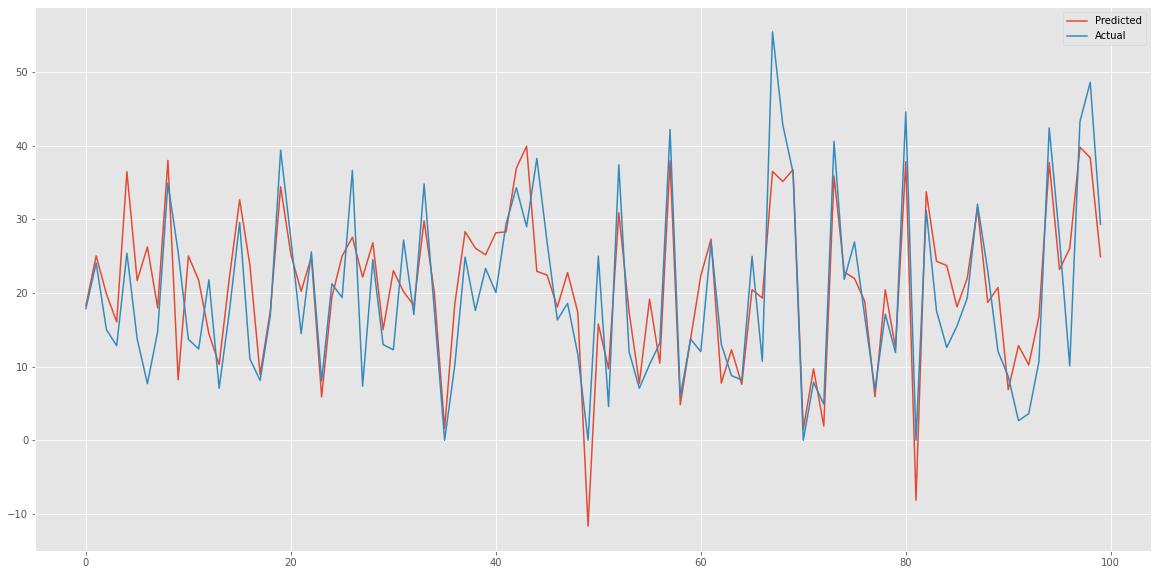

In [ ]:
# calling train_linear_model to train,fit and evalution of lasso model
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

In [ ]:
# Using GridSearchCV with lasso regression

from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
# creating a function to calculate and print r2 and adj r2 scores

def model_metrics(y_actual,y_predicted,X_test):

  '''This function takes train test split and prediction data and prints model metrics'''

  print('MSE :',mean_squared_error(y_actual,y_predicted))
  print("RMSE :" ,np.sqrt(mean_squared_error(y_actual,y_predicted)))

  r2 = r2_score(y_actual, y_predicted)

  print('r2_score :',r2)
  print('Adjusted R2 :', (1-(1-r2_score(y_actual, y_predicted))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

In [ ]:
# printing the model scores

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

y_pred_lasso = lasso_regressor.predict(X_test)              # testing model

print(f'Train Score :{lasso_regressor.score(X_train,y_train)}')
print(f'Test score :{lasso_regressor.score(X_test,y_test)}')
model_metrics(y_test,y_pred_lasso,X_test)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -53.68635775226454
Train Score :-53.36048573358071
Test score :-53.233731567210775
MSE : 53.233731567210775
RMSE : 7.2961449798651055
r2_score : 0.663005990894572
Adjusted R2 : 0.6598986233601744


##**Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)


================Evalution Matrix=========================

MSE : 173929.15292198694
RMSE : 417.04814221140816
R2 : 0.5830134518806518
Adjusted R2 :  0.5791684860150976

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



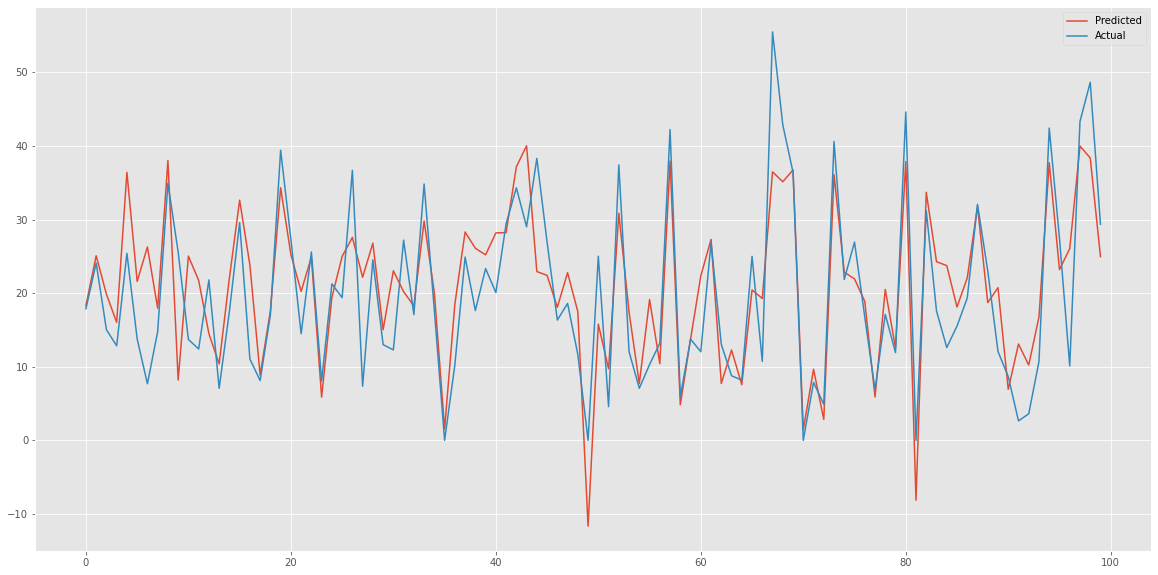

In [ ]:
# calling train_linear_model to train, fit and evalute ridge model

train_linear_model(ridge_grid, X_train, y_train, X_test, y_test)

##**Polynomial Regression**

In [ ]:
# creating pipeline to convert x to polynomial feature and applying Linear Regression

from sklearn.pipeline import make_pipeline
#importing polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pipe = make_pipeline(PolynomialFeatures(degree=2),LinearRegression())


================Evalution Matrix=========================

MSE : 115589.9786950794
RMSE : 339.98526246747724
R2 : 0.7228787388226444
Adjusted R2 :  0.7203234482631483

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



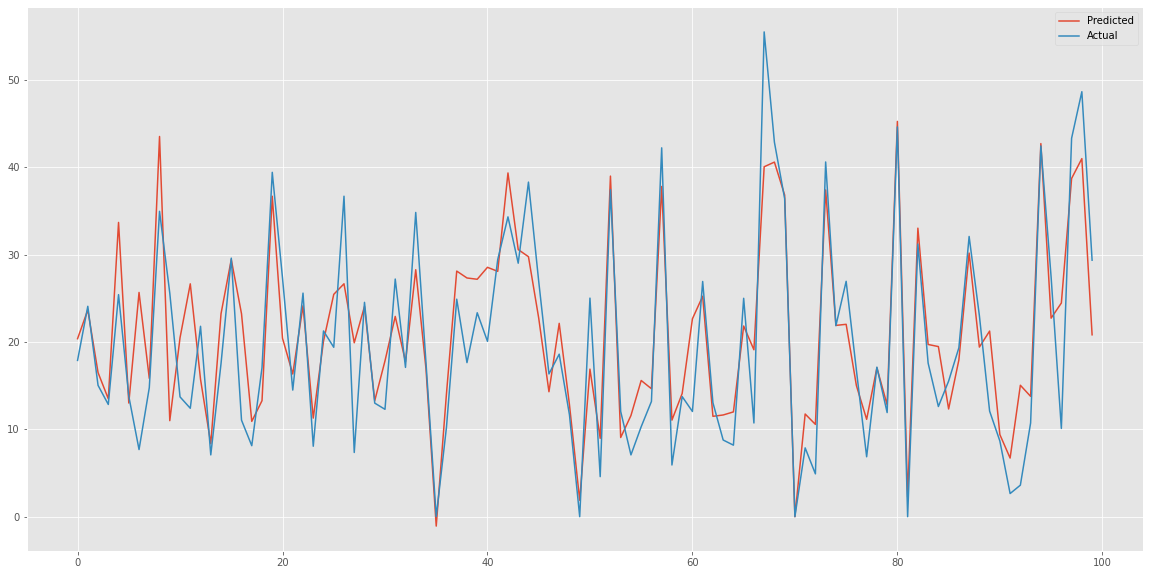

In [ ]:
# calling train_linear_model to train,fit and evalution of polynomial model

train_linear_model(pipe, X_train, y_train, X_test, y_test)

##**ElasticNet Regression**


In [ ]:
# import ElasticNet library

from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)


================Evalution Matrix=========================

MSE : 173868.8696905815
RMSE : 416.9758622397482
R2 : 0.5831579779485991
Adjusted R2 :  0.5793143447346627

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



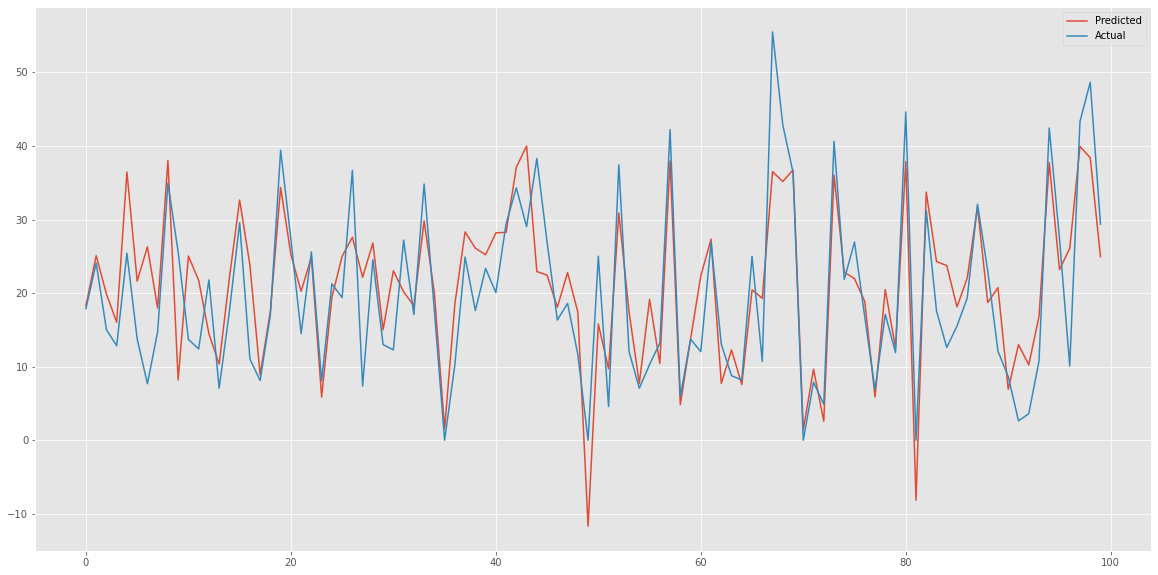

In [ ]:
# calling train_linear_model to train,fit and evalution of elasticnet model

train_linear_model(elastic_grid, X_train, y_train, X_test, y_test)

_____________

# ENSEMBLE MODELS

##**Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state=0)
GBR.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [ ]:
#prediction
y_pred_GBR = GBR.predict(X_test)

print(f'Train Score :{GBR.score(X_train,y_train)}')
print(f'Test score :{GBR.score(X_test,y_test)}')
model_metrics(y_test,y_pred_GBR,X_test)

Train Score :0.8916409197439653
Test score :0.8782263919103882
MSE : 19.236138892264673
RMSE : 4.385902289411458
r2_score : 0.8782263919103882
Adjusted R2 : 0.877103537064011


##**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Random_Forest_reg =RandomForestRegressor()
Random_Forest_reg.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_Random_forest = Random_Forest_reg.predict(X_test)
print(f'Train Score :{Random_Forest_reg.score(X_train,y_train)}')
print(f'Test score :{Random_Forest_reg.score(X_test,y_test)}')
model_metrics(y_test,y_pred_Random_forest,X_test)

Train Score :0.9867818549682787
Test score :0.9065802072872132
MSE : 14.757188656078288
RMSE : 3.8415086432387846
r2_score : 0.9065802072872132
Adjusted R2 : 0.9057187984101935


In [ ]:
parameters = {'ccp_alpha':[0.01,0.1,1,10,100],
              'max_depth': [4, 6, 8],
            'min_samples_leaf': [40, 50],
            'min_samples_split': [50, 100, 150] } 

In [ ]:
Random_Forest_reg = RandomForestRegressor()
Random_forest_grid =GridSearchCV(Random_Forest_reg,param_grid=parameters, verbose=1,cv=2)
Random_forest_grid.fit(X_train, y_train)

Fitting 2 folds for each of 90 candidates, totalling 180 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'ccp_alpha': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150]},
             verbose=1)

In [ ]:
Random_forest_grid.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.1,
 'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
y_pred_Random_forest_grid = Random_forest_grid.predict(X_test)
print(f'Train Score :{Random_forest_grid.score(X_train,y_train)}')
print(f'Test score :{Random_forest_grid.score(X_test,y_test)}')
model_metrics(y_test,y_pred_Random_forest_grid,X_test)

Train Score :0.85687330652152
Test score :0.8385134259511626
MSE : 25.509453291007617
RMSE : 5.050688397734275
r2_score : 0.8385134259511626
Adjusted R2 : 0.8370243842356362


_______


#**Project Conclusion:**
<b><ol>
<li>Bikes were found to be rented more on working days (i.e. non-holidays) and mostly during rush hours of 8:00 am (in morning) till 9:00 pm (in night). 
</li>


---


<li>The demand of rented bikes was more during day time than nights. Further, high surge was observed in bike rental demand in the morning at 8:00 a.m. and 6:00 pm in the evening. This indicates that mostly people prefer to transit to their work place using bikes at 8:00 am  (morning) and return back at 6:00 pm (evening).</li>


---
<li>When the rainfall was less, people have booked more bikes except some few cases.</li>


---

<li>The Temperature, Hour & Humidity are the most important features that positively drive the total rented bikes count.</li>


---



<li>After performing the various linearregression models, it was found that ensemble models provided far more better results than linear regression model and its subsidiaries. </li>

Random forest regressor proved to be the best model with  good train and test scores of 0.98 and 0.96 respectively, and model performance metrics including MSE : 14.85, RMSE: 3.85, and higher similar r2 and adjusted r2 scores of 0.90.


---

<li>In conclusion, the demand prediction for the given Seoul bike sharing dataset can be safely done using Random forest regressor. </li>





________________